In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
target = df.iloc[ : , [3,4] ].values         

In [11]:
# print(target)

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,11):
    k_means_model = KMeans(n_clusters=i, init="k-means++", random_state = 0)
    k_means_model.fit(target)
    wcss.append(k_means_model.inertia_)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

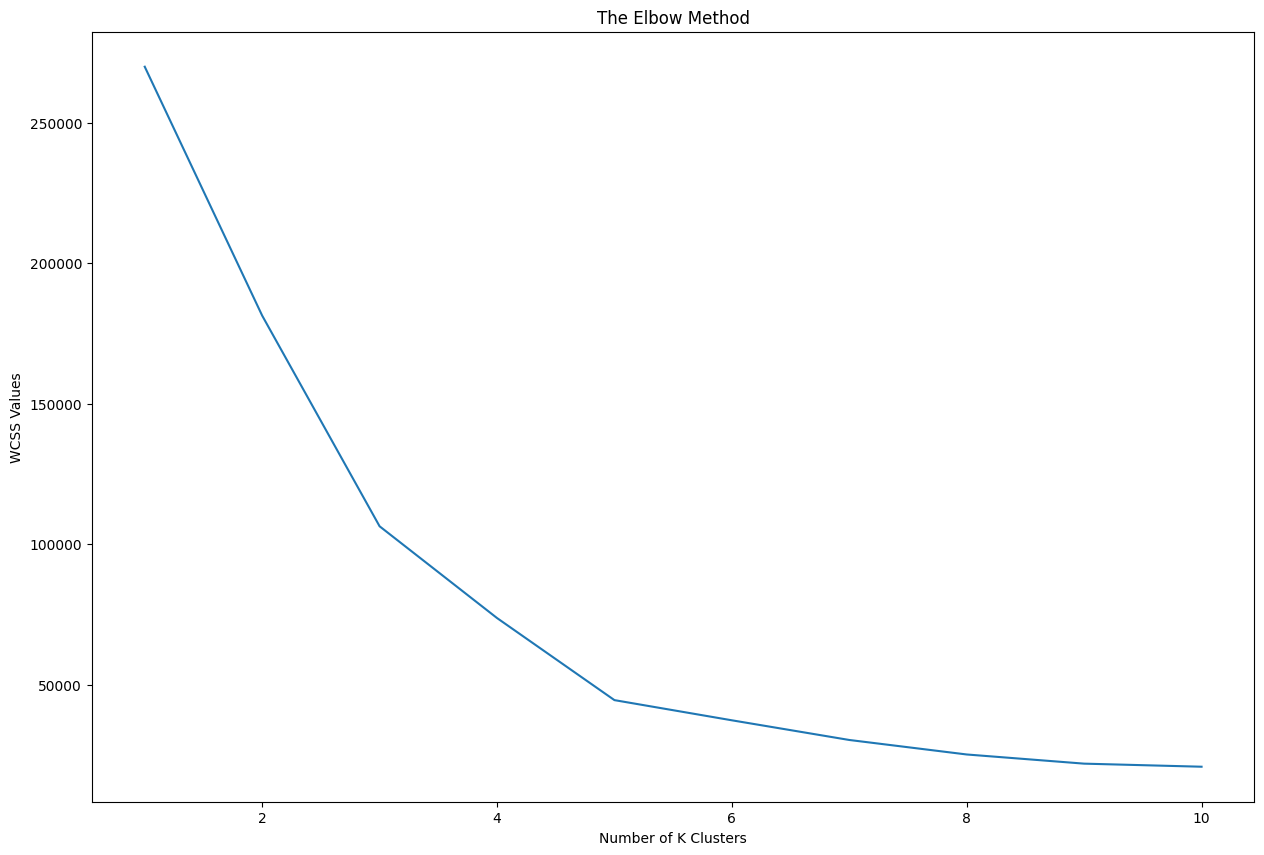

In [14]:
plt.figure(figsize=(15,10))
plt.plot( range(1,11) , wcss )
plt.title("The Elbow Method")
plt.xlabel("Number of K Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [15]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++",random_state=0)

In [16]:
y_kmeans = kmeansmodel.fit_predict(target)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


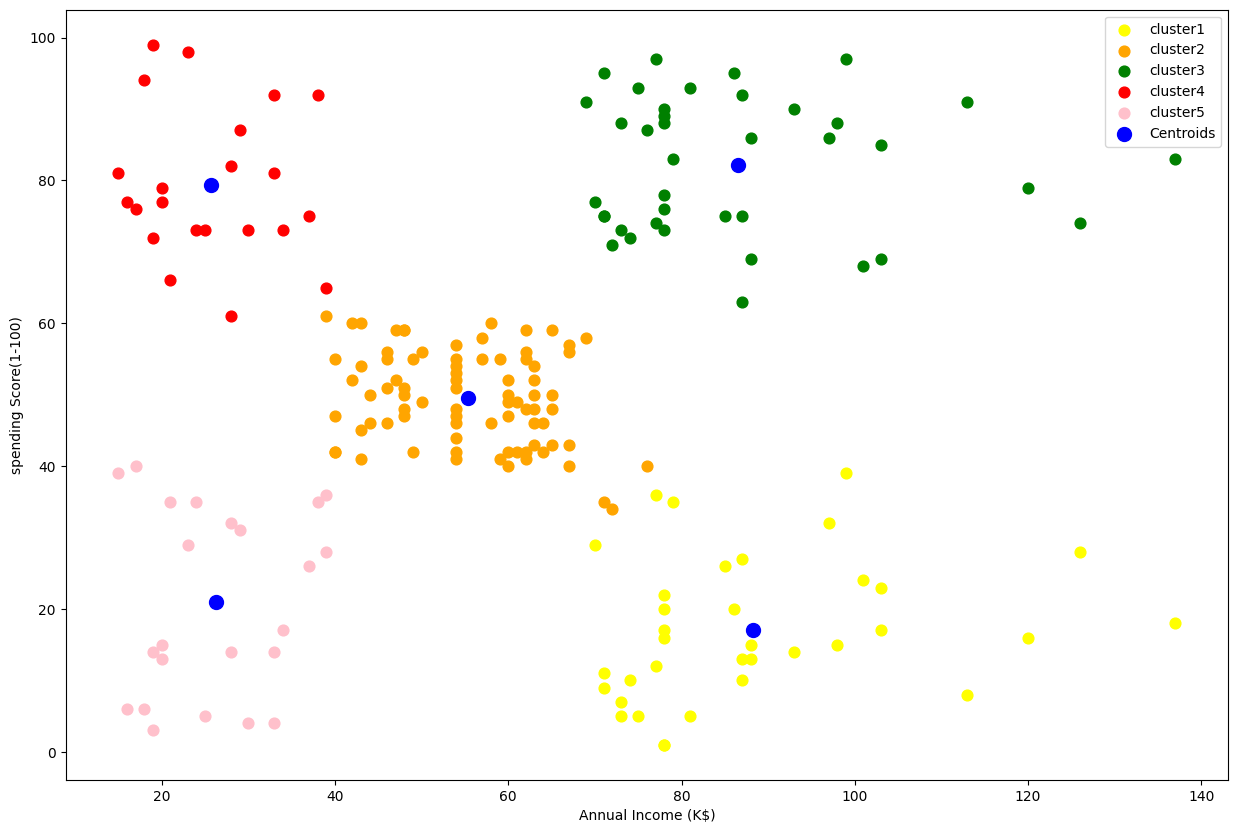

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(target[y_kmeans==0,0],target[y_kmeans==0,1],s=60,c='yellow',label='cluster1')
plt.scatter(target[y_kmeans==1,0],target[y_kmeans==1,1],s=60,c='orange',label='cluster2')
plt.scatter(target[y_kmeans==2,0],target[y_kmeans==2,1],s=60,c='green',label='cluster3')
plt.scatter(target[y_kmeans==3,0],target[y_kmeans==3,1],s=60,c='red',label='cluster4')
plt.scatter(target[y_kmeans==4,0],target[y_kmeans==4,1],s=60,c='pink',label='cluster5')
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=100,c='blue',label='Centroids')
plt.xlabel('Annual Income (K$)')
plt.ylabel('spending Score(1-100)')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
print(silhouette_score(target,y_kmeans))

#  It measures how similar each data point in one cluster is to data points in the same cluster compared to data points in other clusters. 
# The score ranges from -1 to 1

0.553931997444648


In [23]:
# we typically can't use classification metrics like accuracy, precision, recall, or F1-score to evaluate K-Means clustering because they are designed for
# supervised learning problems where you have labeled data and you are trying to predict class labels. K-Means is an unsupervised learning algorithm, 
# In K-Means clustering, the goal is to group data points into clusters based on their similarity or distance from each other. 
# The quality of clustering is assessed by how well the data points are grouped into clusters, but there are no predefined class labels to compare the results against. 
# That's why classification metrics are not applicable.